In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('/content/spam-email-dataset.csv')

In [3]:
print("Dataset Head:")
print(data.head())

Dataset Head:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [5]:
print("\nMissing Values in Dataset:")
print(data.isnull().sum())


Missing Values in Dataset:
Category    0
Message     0
dtype: int64


In [7]:
print("\nValue Counts for 'category':")
print(data['Category'].value_counts())


Value Counts for 'category':
Category
ham     4825
spam     747
Name: count, dtype: int64


<ipython-input-9-327a0a7af54c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=data, palette='coolwarm')


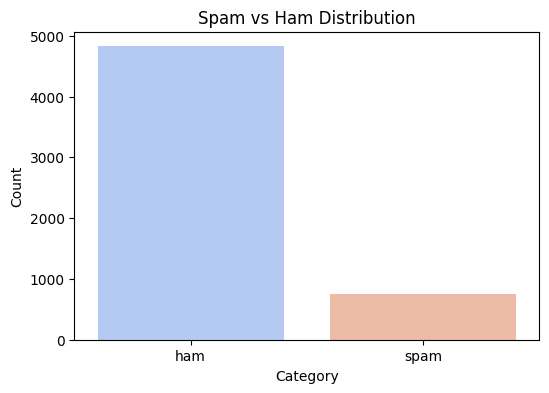

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=data, palette='coolwarm')
plt.title("Spam vs Ham Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [10]:
data['message_length'] = data['Message'].apply(len)
print("\nMessage Length Statistics:")
print(data['message_length'].describe())


Message Length Statistics:
count    5572.000000
mean       80.368988
std        59.926946
min         2.000000
25%        35.750000
50%        61.000000
75%       122.000000
max       910.000000
Name: message_length, dtype: float64


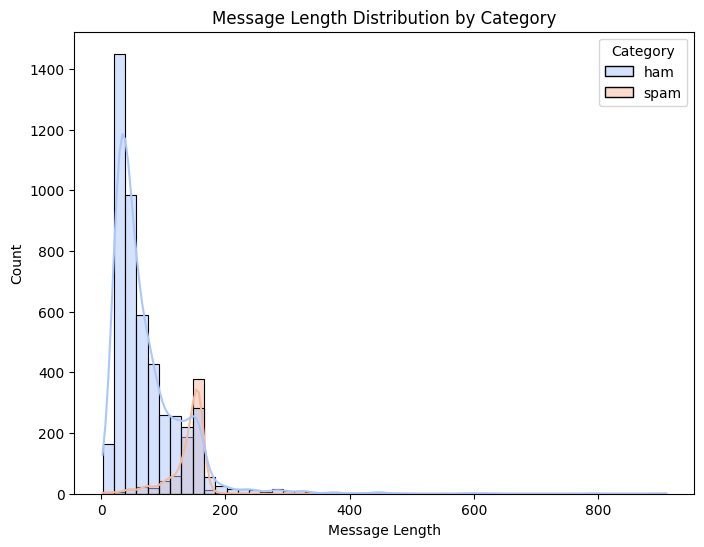

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='message_length', hue='Category', bins=50, kde=True, palette='coolwarm')
plt.title("Message Length Distribution by Category")
plt.xlabel("Message Length")
plt.ylabel("Count")
plt.show()

In [14]:
spam_messages = " ".join(data[data['Category'] == 'spam']['Message'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_messages)

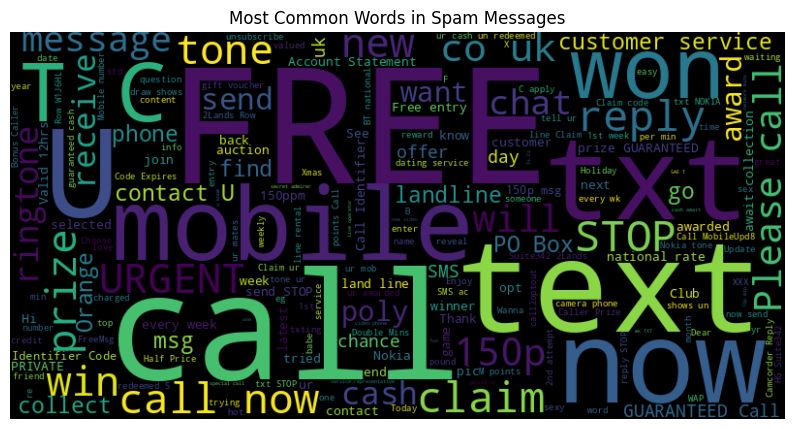

In [15]:
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("Most Common Words in Spam Messages")
plt.axis("off")
plt.show()

In [16]:
ham_messages = " ".join(data[data['Category'] == 'ham']['Message'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)

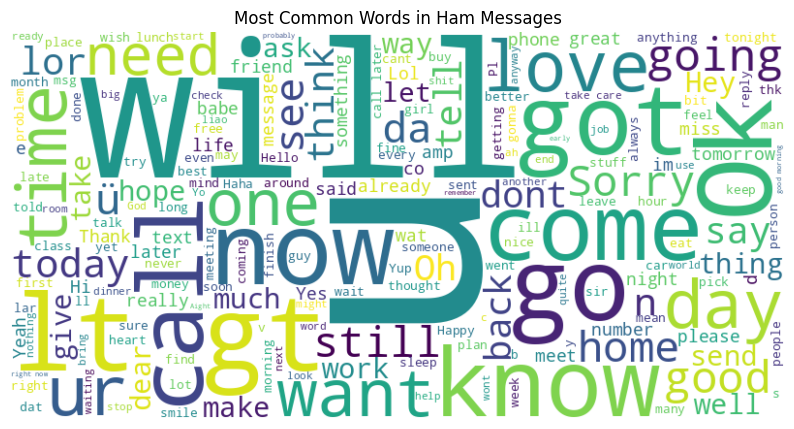

In [17]:
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title("Most Common Words in Ham Messages")
plt.axis("off")
plt.show()

In [18]:
duplicates = data.duplicated().sum()
print("\nNumber of Duplicate Messages:", duplicates)


Number of Duplicate Messages: 415
